# <Font color = 'dodgerblue'>**Zero Shot Classification using Huggingface Pipeline**

This task involves practical application of zero-shot classification to categorize restaurant review sentences. By leveraging a pre-trained model , we will gain hands-on experience in utilizing natural language inference techniques for text classification.




# <Font color = 'dodgerblue'>**Zero Shot Classification - Brief Overview** </font>

### Introduction to Natural Language Inference (NLI)

Natural Language Inference (NLI) is a task in natural language processing where a model determines the relationship between two sentences, often referred to as the premise and the hypothesis. The relationship might be **entailment (the hypothesis follows from the premise)**, contradiction, or neutrality.

### Zero-Shot Classification Using Hugging Face's Pipeline

Building on NLI, Hugging Face's zero-shot classification leverages entailment (hypotheses follows from the premise) relationships to classify text into various categories.

1. **Premise:** The input text, like a restaurant review.

2. **Labels**:<br>
Possible labels (categories) represent distinct classifications within a given problem. In the context of the review dataset that you will be working with, the possible labels correspond to specific aspects of a dining experience. The labels include: 'food,' referring to the quality and taste of the dishes; 'ambiance,' reflecting the overall atmosphere and decor of the restaurant; 'service,' pertaining to the staff's attentiveness and professionalism; and 'other,' a category that encompasses any additional comments or observations not covered by the aforementioned labels.

3. **Hypothesis Template:**<br>
A specially formatted string that transforms each label into an NLI-style hypothesis. An example of hypothesis template could be **"This example is {}."**. The {} is a placeholder where the candidate label is inserted, allowing the model to consider each label as a potential classification.

3. **Forming Hypotheses using template and labels:**<br>
Based on the label examples and hypothesis template, the resulting hypotheses will be:
   - "This example is food."
   - "This example is ambiance."
   - "This example is service."
   - "This example is other."

4. **Zero-Shot Classification Process:**
   - **Step 1:** Combine premise and hypotheses.
   - **Step 2:** Utilize a pre-trained NLI model to calculate entailment probabilities (probability that hypothesis follows from premise) for each hypothesis.
   - **Step 3:** Return the probabilities for each label.

### Example

Given a review like "The food was excellent," the model might return:
   - food: 0.95
   - ambiance: 0.05
   - service: 0.02
   - other: 0.023

**The probability of 0.95 for the label "food" means that the model has a 95% confidence that the premise "The food was excellent" entails the hypothesis "This example is food."**  The other probabilities represent the model's confidence for the remaining labels.

### Conclusion

Hugging Face's zero-shot classification pipeline calculates probabilities for multiple categories by leveraging NLI concepts. This approach offers flexibility in text analysis without the need for task-specific training, providing insights into the relevance of different labels to a given text.




# <Font color = 'dodgerblue'>**Data and Task Description**

- For this Question, you are provided a csv file (review_sentences.csv) that has 584 sentences from restautant reviews from Yelp. You have to classify the sentences in to four labels: `["food," "ambiance," "service," and "other."]`.
- The csv file is availble in eLearning in 0_Data folder.
- You will use a zero-shot-classification pipleine from huggingface to make predictions.
- You are also provided the actual labels. You will use these labels to access the accuracy of the model.

# <font color = 'indian red'> **Install/Import Modules**

In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install transformers -U -qq
    !pip install sentencepiece -U -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.2 MB/s eta 0:00:00


In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical computing
import numpy as np

# Import the Matplotlib library for creating visualizations such as plots, graphs, etc.
import matplotlib.pyplot as plt

# Import the pathlib library for working with file paths in a way that is cross-platform
from pathlib import Path

# Import functions for metrics computation like confusion matrix, and accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Import the transformers library for state-of-the-art Natural Language Processing (NLP) models like BERT, GPT, etc.
from transformers import pipeline


In [ ]:
import os
os.cpu_count()

8

In [ ]:
!nvidia-smi

Fri Sep  1 16:09:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip show transformers

Name: transformers
Version: 4.32.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


# <font color = 'indian red'>**Specify Base folder for Project**

In [ ]:
# Check if the code is running in a Colab environment
if 'google.colab' in str(get_ipython()):# If the code is running in Colab

    # mount google drive
    from google.colab import drive
    drive.mount('/content/drive', force_remount= True)

    # set the base path to a Google Drive folder
    base_path = '/content/drive/MyDrive/'


# Convert the base path to a Path object
base_folder = Path(base_path)

# Define the archive folder path
archive_folder = base_folder/'archive'

# Define the data folder path
data_folder = base_folder/''

Mounted at /content/drive


## <Font color = 'dodgerblue'>**Create DataFrame**

In [ ]:
#data_folder = base_folder/'datasets/yelp_food_service_ambience'  # MAKE SURE TO CHANGE THE PATH

In [ ]:
# location of train and test files
data_file = data_folder /'review_sentences.csv'

In [ ]:
# creating Pandas Dataframe
train_data = pd.read_csv(data_file, index_col=0, encoding='ISO-8859-1')

In [ ]:
# print shape of the datasets
print(f'Shape of Training data set is : {train_data.shape}')

Shape of Training data set is : (584, 2)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         584 non-null    object
 1   final_label  584 non-null    object
dtypes: object(2)
memory usage: 13.7+ KB


In [ ]:
# check first five examples
train_data.head()

,text,final_label
sentences,,
0,"If you love unagi (eel) on rice, you'll absolu...",food
1,But it is definitely worth the wait.,service
3,Sometimes get the Pho w/ rare beef which is de...,food
4,"Other items on this menu was a crab soup, duck...",food
5,I visited the restaurant for lunch and arrived...,other


In [ ]:
# check disytribution of labels
train_data['final_label'].value_counts()

food        279
other       139
service     120
ambiance     46
Name: final_label, dtype: int64

## <Font color = 'dodgerblue'>**Load Pipeline**

In [ ]:
# Load zero shot classification pipleine - do not pass any model. We will use the default model
# use pytorch as framework and move the pipleine to GPU
# syntax : zero_shot_classifier = pipeline(name-of-pipeline, framework=, device =)

zero_shot_classifier = pipeline("zero-shot-classification",
                      framework='pt',
                     device = 0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


## <Font color = 'dodgerblue'>**Task1 : Base experiment**.

- **In this Task you will pass all the four labels to the classifier.**

### <Font color = 'dodgerblue'>**Create a list of reviews**

In [ ]:
# create a list of reviews ( use column.tolist() to convert numpy array series to python list)
texts_train =   train_data['text'].tolist()

# list of labels
candidate_labels = ['food', 'service', 'ambiance', 'other']

### <Font color = 'dodgerblue'>**Get Probbailities**

Pass the list of text and labels you created in the previous step to the classifier to get predictions.

The syntax is : **```probs = zero_shot_classifier(sequences= , candidate_labels =  )```**

In [ ]:
probs = zero_shot_classifier(texts_train,candidate_labels)

In [ ]:
probs[0: 3]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'ambiance', 'service', 'other'],
  'scores': [0.9423722624778748,
   0.023495187982916832,
   0.021316785365343094,
   0.012815762311220169]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['other', 'service', 'ambiance', 'food'],
  'scores': [0.4905829429626465,
   0.2534791827201843,
   0.20231030881404877,
   0.05362754687666893]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'other', 'service', 'ambiance'],
  'scores': [0.7790170311927795,
   0.10868176817893982,
   0.08358323574066162,
   0.02871803753077984]}]

### <Font color = 'dodgerblue'>**Get Predictions**
- The output from the classifier will give you the probbaility for each label
- The label with the highest probbaility should be your prediction
- You might need to use more than one line of the code to complete this step

In [ ]:
predictions = [x['labels'][0] for x in probs]

In [ ]:
# get first five preeictions
predictions[0:5]

['food', 'other', 'food', 'food', 'food']

### <Font color = 'dodgerblue'>**Accuracy**
- You might need to use more than one line of the code to complete this step
- Now you have the actual Label and predicted Label for each sentence.
- Calculate the overall acacuracy ( : you can use accuracy_score form from sklearn - `from sklearn.metrics import accuracy_score`


In [ ]:
accuracy =  accuracy_score(train_data['final_label'].to_list(),predictions) * 100
accuracy

66.6095890410959

### <Font color = 'dodgerblue'>**Classification Report**
- Print the classification report
- - `from sklearn.metrics import classification_report`

In [ ]:
y_true = train_data['final_label'].to_list()
y_pred = predictions

class_report = classification_report(y_true,y_pred)
print(class_report)

              precision    recall  f1-score   support

    ambiance       0.39      0.33      0.36        46
        food       0.76      0.84      0.80       279
       other       0.52      0.54      0.53       139
     service       0.69      0.54      0.61       120

    accuracy                           0.67       584
   macro avg       0.59      0.56      0.57       584
weighted avg       0.66      0.67      0.66       584



### <Font color = 'dodgerblue'>**Conclusion from the classification report** </font>

The model has an overall accuracy of 67% which is good but we can still improve it




### <Font color = 'dodgerblue'>**Confusion Matrix**
- You might need to use more than one line of the code to complete this step
- Print confusionm matrix
- :use ConfusionMatrixDisplay.from_predictions from sklearn

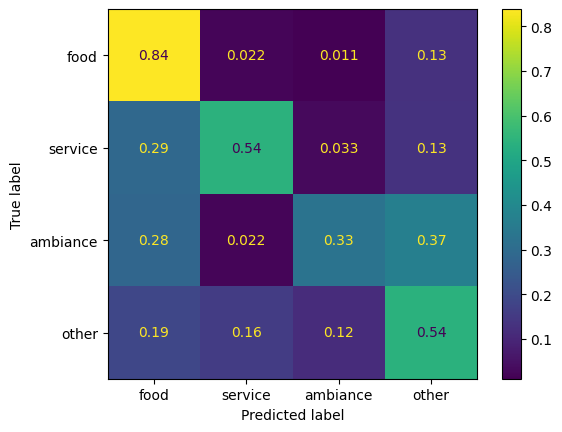

In [ ]:
# CODE HERE
ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize ='true',labels= candidate_labels)

### <Font color = 'dodgerblue'>**Conclusions from the Confusion Matrix** </font>


84% of 'food' labels are correctly classified as food,
54% of 'service' labels are correctly classified as service,
33% of 'ambiance' labels are correctly classified as ambiance,
and 54% of 'other' labels are correctly classified as other.




## <Font color = 'dodgerblue'>**Task2 : Change hypothesis template**. </font>

In this experiment, we are exploring the impact of changing the hypothesis template in a zero-shot classification model. The default template used in the pipeline is **"This example is {}"**. In the experiment the default template is being replaced with a domain-specific template to classify restaurant reviews into categories like food, service, ambiance, and other.

### Steps:

1. **Modify Hypothesis Template:** Adjust the template to better fit the context of restaurant reviews.
2. **Evaluate Model:** Apply the modified template and report accuracy, a classification report, and confusion matrix.
3. **Compare Results:** Analyze the findings in comparison to the previous experiment using the default template.

### Conclusion:

Changing the hypothesis template may lead to variations in model performance, possibly improving accuracy in certain categories. The comparison between the experiments can reveal insights into how the model interprets premises differently with various templates, helping to tailor the model to specific tasks or domains.

### <Font color = 'dodgerblue'>**Create a list of reviews**

In [ ]:
# create a list of reviews ( use column.tolist() to convert pandas series to python list)
texts_train =   train_data['text'].tolist()

# list of labels
candidate_labels = ['food', 'service', 'ambiance', 'other']

### <Font color = 'dodgerblue'>**Get Probbailities**

In the previous experiment, you only passed sequences and candiadte labels. Since you did not pass any hypothesis template, the classifier used the default template "This example is {}." Now, in this experiment, you will introduce a custom hypothesis template to replace the default. The suggested custom template is "This review is related to the restaurant's {}." By specifying a template more aligned with the context of restaurant reviews, you may influence how the classifier interprets the relationship between the premise and each candidate label. Feel free to explore other custom templates that may be suitable for this task, and compare how these changes affect the classification performance.

The syntax is : **```zero_shot_classifier(sequences= , candidate_labels = , hypothesis_template =   )```**

In [ ]:
# pass the sequences, candiadte labels and hypothesis_template to the classifier
# CODE HERE
probs = zero_shot_classifier(texts_train,candidate_labels,hypothesis_template = "This review is related to the restaurant's {}.")

In [ ]:
probs[0:3]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'other', 'service', 'ambiance'],
  'scores': [0.8286234140396118,
   0.1660204827785492,
   0.002787330187857151,
   0.0025688130408525467]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['other', 'food', 'service', 'ambiance'],
  'scores': [0.3562210202217102,
   0.30787432193756104,
   0.24831949174404144,
   0.08758512139320374]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'other', 'ambiance', 'service'],
  'scores': [0.809067964553833,
   0.18316298723220825,
   0.004174679517745972,
   0.003594418754801154]}]

### <Font color = 'dodgerblue'>**Get Predictions**
- The output from the classifier will give you the probbaility for each label
- The label with the highest probbaility should be your prediction
- You might need to use more than one line of the code to complete this step

In [ ]:
predictions = [x['labels'][0] for x in probs]

In [ ]:
# get first five preeictions
predictions[0:5]

['food', 'other', 'food', 'food', 'other']

### <Font color = 'dodgerblue'>**Accuracy**
- You might need to use more than one line of the code to complete this step
- Now you have the actual Label and predicted Label for each sentence.
- Calculate the overall acacuracy ( : you can use accuracy_score form from sklearn - `from sklearn.metrics import accuracy_score`


In [ ]:
# CODE HERE
accuracy =  accuracy_score(train_data['final_label'].to_list(),predictions) * 100
accuracy

78.76712328767124

### <Font color = 'dodgerblue'>**Classification Report**
- Print the classification report
- - `from sklearn.metrics import classification_report`

In [ ]:
# print classification report
# CODE HERE
y_true = train_data['final_label'].to_list()
y_pred = predictions

class_report = classification_report(y_true,y_pred)
print(class_report)

              precision    recall  f1-score   support

    ambiance       0.90      0.41      0.57        46
        food       0.88      0.84      0.86       279
       other       0.60      0.91      0.72       139
     service       0.93      0.68      0.78       120

    accuracy                           0.79       584
   macro avg       0.83      0.71      0.73       584
weighted avg       0.83      0.79      0.79       584



### <Font color = 'dodgerblue'>**Compare the classification report** </font>

Compare the classification report with previous experiment and provide your conclusion.

YOUR RESPONSE HERE : If we compare the overall accuracy with the previouse experiment the overall accuracy has increased from 67% to 79% which is a 12% increase,with only modifing the hypothesis template thats a very nice improvment in the overall accuracy.

### <Font color = 'dodgerblue'>**Confusion Matrix**
- You might need to use more than one line of the code to complete this step
- Print confusionm matrix
- :use ConfusionMatrixDisplay.from_predictions from sklearn

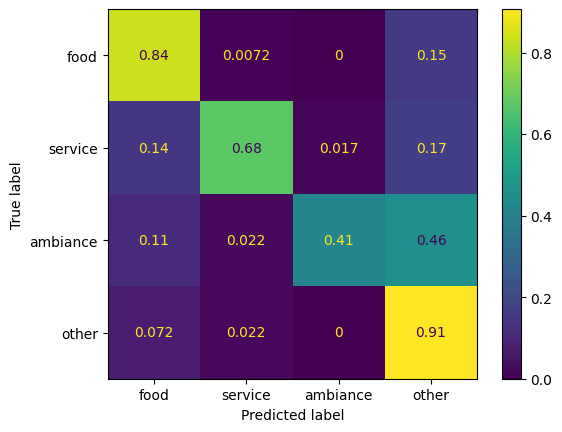

In [ ]:
# CODE HERE
ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize ='true',labels= candidate_labels)

###<Font color = 'dodgerblue'>**Conclusions from the Confusion Matrix** </font>

What do you conclude from the Confusion Matrix (compare with previous experiment)?

YOUR RESPONSE HERE : Comparing with previous experiments the 'food' labels which are correctly classified are still 84%, the 'service' labels which are correctly classified has increased from 57% to 68%, similarly for 'ambiance' there is a increase from 33% to 41% and lastly for 'other' labels there is a huge increase from 54% to 91%.


## <Font color = 'dodgerblue'>**Task3 : Use threshold probbaility to classify Others**.




In this next experiment, you will explore a nuanced approach to classification by **only considering the labels 'food', 'service', and 'ambiance'**. This is a departure from the previous experiments, where you also included 'other' as a label, and it brings some key distinctions:

Unlike traditional classification, where the probabilities across all labels sum to one, in this experiment, you'll assess the probabilities for just the three given labels.

By not including 'other' as a label, you are essentially allowing the model to classify instances into 'other' if none of the given labels strongly apply. If the maximum probability across 'food', 'service', and 'ambiance' is less than the threshold, the instance is classified as 'other'.

This approach not only recognizes that some instances may not fit neatly into one of the specific categories but also aims to refine the handling of those instances. It encourages a more flexible and discerning classification, possibly reducing misclassification.

The task will allow you to explore how this method of classification, guided by a threshold, can impact the model's performance. It offers an insightful comparison with the previous approaches and underlines the significance of understanding the nature of your data, the relationships between categories, and selecting an appropriate classification strategy accordingly.

### <Font color = 'dodgerblue'>**Create a list of reviews**

In [ ]:
# create a list of reviews ( use column.tolist() to convert pandas series to python list)
texts_train = train_data['text'].to_list()

# list of labels
candidate_labels = ['food', 'service', 'ambiance'] #  MAKE SURE YOU DO NOT PASS 'other' in candidate labels

### <Font color = 'dodgerblue'>**Get Probbailities**

Pass the list of text and labels you craeted in the previous step to the classifier to get predictions.

In [ ]:
# pass the sequences, candiadte labels and hypothesis_template to the classifier
# CODE HERE
probs = zero_shot_classifier(texts_train,candidate_labels,hypothesis_template = "This review is related to the restaurant's {}.")

In [ ]:
probs[0: 5]

[{'sequence': "If you love unagi (eel) on rice, you'll absolutely enjoy their version.",
  'labels': ['food', 'service', 'ambiance'],
  'scores': [0.9935776591300964,
   0.0033422044944018126,
   0.0030801871325820684]},
 {'sequence': 'But it is definitely worth the wait.',
  'labels': ['food', 'service', 'ambiance'],
  'scores': [0.4782298803329468, 0.38572168350219727, 0.13604843616485596]},
 {'sequence': 'Sometimes get the Pho w/ rare beef which is decent.',
  'labels': ['food', 'ambiance', 'service'],
  'scores': [0.9904888272285461, 0.00511078629642725, 0.004400411155074835]},
 {'sequence': 'Other items on this menu was a crab soup, duck and clams congee, 2 desserts (one chinese and one western) and free appetizers.',
  'labels': ['food', 'service', 'ambiance'],
  'scores': [0.9874481558799744, 0.006339206825941801, 0.006212593987584114]},
 {'sequence': 'I visited the restaurant for lunch and arrived there just after 12.30pm on a Sunday.',
  'labels': ['food', 'ambiance', 'service

### <Font color = 'dodgerblue'>**Get Predictions** </font>

In this experiment , you'll be considering three specific categories: 'food', 'service', 'ambiance', and classify any instance that doesn't fit these categories as 'other'. To make this decision, you will use a concept called a threshold.

#### Understanding the Threshold Concept:
The threshold is a cutoff value that helps determine the class labels based on predicted probabilities. Here's how it works:

Imagine your model predicts the following probabilities for a review:
- 'food': 0.7
- 'service': 0.2
- 'ambiance': 0.1

With a threshold of 0.5, you check whether the highest probability (0.7 for 'food') is greater than this threshold. Since 0.7 > 0.5, the review is classified as 'food'. If the highest probability dees not surpass the threshold, you classify the review as 'other'. By adjusting the threshold, you control how confident the model must be to assign a particular label.

**In this experiment, you will use a theshold of 0.8**

In [ ]:
threshold = 0.8

In [ ]:
predictions = [x['labels'][0] if x['scores'][0] > threshold else 'other' for x in probs]

In [ ]:
# get first five predictions
predictions[0:5]

['food', 'other', 'food', 'food', 'other']

### <Font color = 'dodgerblue'>**Accuracy**
- You might need to use more than one line of the code to complete this step
- Now you have the True Label and predicted Label for each sentence.
- Calculate the overall acacuracy (We can use accuracy_score form from sklearn - `from sklearn.metrics import accuracy_score`


In [ ]:
accuracy =  accuracy_score(train_data['final_label'].to_list(),predictions) * 100
accuracy

76.02739726027397

**The overall accurtacy has decreased. This might be the result of chosen threshold**

### <Font color = 'dodgerblue'>**Classification Report**
- Print the classification report
- - `from sklearn.metrics import classification_report`

In [ ]:
# print classification report
y_true = train_data['final_label'].to_list()
y_pred = predictions

class_report = classification_report(y_true,y_pred)
print(class_report)

              precision    recall  f1-score   support

    ambiance       0.95      0.41      0.58        46
        food       0.91      0.85      0.88       279
       other       0.53      0.88      0.66       139
     service       0.93      0.53      0.68       120

    accuracy                           0.76       584
   macro avg       0.83      0.67      0.70       584
weighted avg       0.83      0.76      0.76       584



### <Font color = 'dodgerblue'>**Compare the classification report** </font>

Compare the classification report with previous experiment and provide your conclusion.

YOUR RESPONSE HERE : If we compare this with previous experiment the overall accuracy has decreased from 78% to 76%, we cannot say if this experiment is performing poorly than previous experiment, we are explicitly specifying the threshold value as 0.8,while we do not know what would be the exact threshold value which gives us the best accuracy score from training data.

### <Font color = 'dodgerblue'>**Confusion Matrix**
- You might need to use more than one line of the code to complete this step
- Print confusionm matrix
- :`from sklearn.metrics import confusion_matrix``

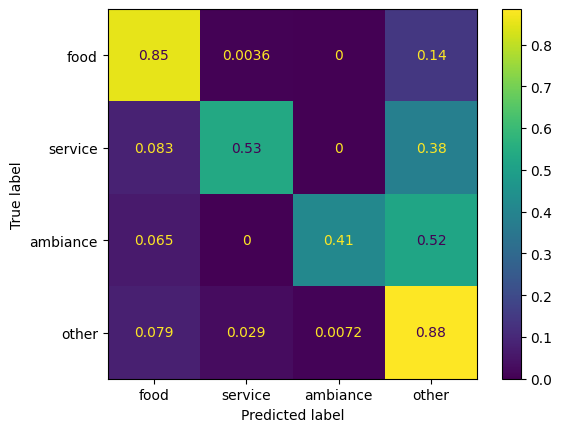

In [ ]:
# CODE HERE
ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize ='true',labels= ['food', 'service', 'ambiance','other'])


### <Font color = 'dodgerblue'>**Conclusions from the Confusion Matrix** </font>

Comparing with previous experiments the 'food' labels which are correctly classified increased by 1% i.e 85%, the 'service' labels which are correctly classified has decreased from 68% to 53%, the correctly classified 'ambiance' labels are still at 41% and lastly for 'other' labels there is a decrease from 91% to 88%.

As we can see the correctly classified labels in last experiments have slightly decreased we should tweak the threshold value and see how the model performs.

## <Font color = 'dodgerblue'>**BONUS TASK (Not Graded) - Function to choose threshold to maximize accuracy**.

Let us assume that our business goal is to maximize accuracy.
Write a function to determine the optimal threshold (maximum accuracy for classification) and to provide predictions that align with that threshold. You will also keep track of accuracy at each threshold level.

#### Pseudo Code:

```plaintext
1. Function predict_labels(probs, actual_labels, thresholds=[0.5]):
2.     Initialize best_threshold = 0
3.     Initialize best_accuracy = 0
4.     Initialize best_predictions = empty list
5.     Initialize accuracy_history = empty list
6.     FOR EACH threshold IN thresholds:
7.         Initialize predictions = empty list
8.         FOR EACH prob IN probs:
9.             Extract max_prob as the highest score among the probabilities in prob['scores']
10.            IF max_prob > current threshold THEN:
11.                Append the corresponding label to predictions (e.g., 'food')
12.            ELSE:
13.                Append 'other' to predictions
14.            END IF
15.        END FOR EACH prob
16.        Calculate accuracy using accuracy_score comparing predictions with actual_labels
17.        Append the accuracy to accuracy_history
18.        IF current accuracy > best_accuracy THEN:
19.            Update best_threshold, best_accuracy, and best_predictions
20.        END IF
21.    END FOR EACH threshold
22.    Return best_threshold, best_predictions and accuracy_history
23. END Function
```

In [ ]:
def predict_labels(probs, actual_labels, thresholds=[0.5]):
    best_threshold = 0
    best_accuracy = 0
    best_predictions = []
    accuracy_history = []
    for threshold in thresholds:
      predictions = []
      for prob in probs:
        max_prob = prob['scores'][0]
        if max_prob > threshold:
          predictions.append(prob['labels'][0])
        else:
          predictions.append('other')
      acc = accuracy_score(actual_labels,predictions)
      accuracy_history.append(acc)
      if acc > best_accuracy:
        best_threshold = threshold
        best_accuracy = acc
        best_predictions = predictions
    return best_threshold, best_predictions, accuracy_history

### <Font color = 'dodgerblue'>**Get best predictions and threshold**
Use the function to get best_threshold, best_predictions and accuracy_history

In [ ]:
thresholds=np.linspace(0.1, 0.95, 18)
thresholds

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
actual_labels = train_data['final_label'].values

In [ ]:
best_threshold, best_predictions, accuracy_history =  predict_labels(probs, actual_labels, thresholds)

In [ ]:
best_threshold

0.6

In [ ]:
best_predictions[0:5]

['food', 'other', 'food', 'food', 'food']

### <Font color = 'dodgerblue'>**Accuracy**
Plot accuracy_history against thresholds


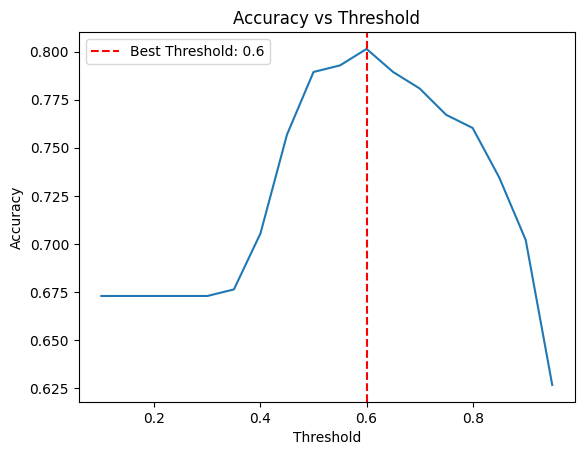

In [ ]:
# CODE HERE
fig, ax = plt.subplots()
ax.plot(thresholds, accuracy_history)
ax.axvline(best_threshold, color='r',linestyle = '--', label = 'Best Threshold: {}'.format(best_threshold))
ax.legend()
ax.set_xlabel('Threshold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Threshold')
plt.show()

In [ ]:
# Best  Accuracy
accuracy =  accuracy_score(train_data['final_label'].to_list(),best_predictions) * 100
accuracy

80.13698630136986

Is the accuracy better than Task 2?

**We can see that accuracy has slightly improved from Task2 (where we passed all four labels)**

### <Font color = 'dodgerblue'>**Confusion Matrix**

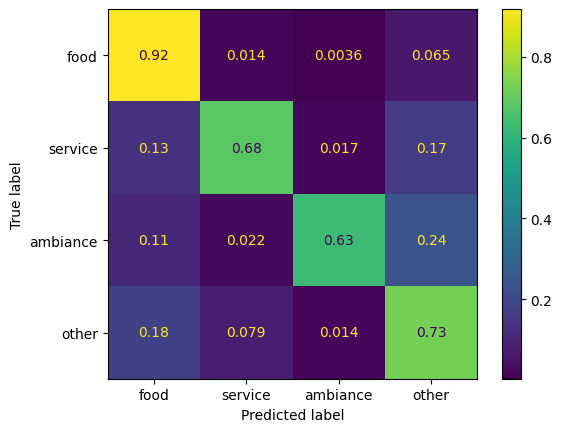

In [ ]:
# CODE HERE
ConfusionMatrixDisplay.from_predictions(y_true,best_predictions,normalize ='true',labels= ['food', 'service', 'ambiance','other'])

### <Font color = 'dodgerblue'>***Exteneded Experimental Code***

In the below extended code we are trying to use a different hypothesis_template and use the function predict_labels which results in slightly better accuracy.

In [ ]:
texts_train = train_data['text'].to_list()

# list of labels
candidate_labels = ['food', 'service', 'ambiance']

probs = zero_shot_classifier(texts_train, candidate_labels, hypothesis_template="The main topic of this review is the {} of the restaurant.")
best_threshold, best_predictions, accuracy_history =  predict_labels(probs, actual_labels, thresholds)

In [ ]:
# Best  Accuracy
accuracy =  accuracy_score(train_data['final_label'].to_list(),best_predictions) * 100
accuracy

82.1917808219178

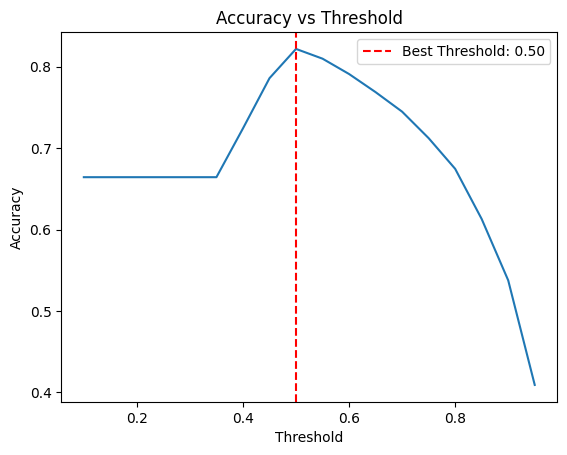

In [ ]:
# CODE HERE
fig, ax = plt.subplots()
ax.plot(thresholds, accuracy_history)
ax.axvline(best_threshold, color='r',linestyle = '--', label = 'Best Threshold: {:.2f}'.format(best_threshold))
ax.legend()
ax.set_xlabel('Threshold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Threshold')
plt.show()

The model, equipped with a slightly different hypothesis template and utilizing the predict_labels function to determine a threshold that maximizes accuracy, yields the best results. This optimal threshold is set at 0.5, resulting in an accuracy of 82.19%, which is significantly superior to all the previous experiments outcome if our business objective is to maximize accuracy.